###Creo la representación de media lunas

Para ello utilizo el dataset make_moons de la biblioteca sklearn y le asigno un ruido pequeño de 0.05

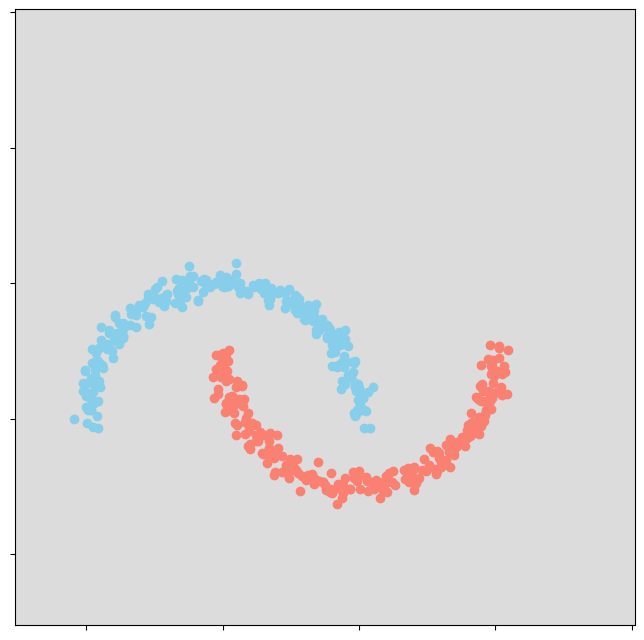

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.
X, Y = make_moons(n_samples=500, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 3, res)
_x1 = np.linspace(-1.5, 3, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

### Sklearn

Voy a crear una red neuronal de la manera más simple posible, usando la biblioteca sklearn

Iteration 1, loss = 0.69574103
Iteration 2, loss = 0.68236196
Iteration 3, loss = 0.67040567
Iteration 4, loss = 0.65248529
Iteration 5, loss = 0.64060813
Iteration 6, loss = 0.62645181
Iteration 7, loss = 0.61084703
Iteration 8, loss = 0.59525892
Iteration 9, loss = 0.57858042
Iteration 10, loss = 0.56081391
Iteration 11, loss = 0.54216336
Iteration 12, loss = 0.52472253
Iteration 13, loss = 0.50460904
Iteration 14, loss = 0.48567227
Iteration 15, loss = 0.46733308
Iteration 16, loss = 0.44844887
Iteration 17, loss = 0.43264732
Iteration 18, loss = 0.41769112
Iteration 19, loss = 0.40208157
Iteration 20, loss = 0.39089323
Iteration 21, loss = 0.37901359
Iteration 22, loss = 0.36926472
Iteration 23, loss = 0.36102158
Iteration 24, loss = 0.35388735
Iteration 25, loss = 0.34698285
Iteration 26, loss = 0.34135068
Iteration 27, loss = 0.33576658
Iteration 28, loss = 0.33099026
Iteration 29, loss = 0.32703039
Iteration 30, loss = 0.32202784
Iteration 31, loss = 0.31811874
Iteration 32, los

Streaming output truncated to the last 5000 lines.
<ipython-input-2-2862261576>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _Y[i0, i1] = clf.predict(np.array([[x0, x1]]))
<ipython-input-2-2862261576>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _Y[i0, i1] = clf.predict(np.array([[x0, x1]]))
<ipython-input-2-2862261576>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _Y[i0, i1] = clf.predict(np.array([[x0, x1]]))
<ipython-input-2-2862261576>:16: Depreca

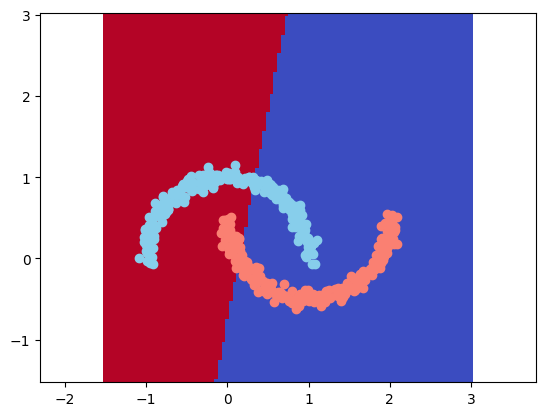

In [2]:
import sklearn as sk
import sklearn.neural_network

lr = 0.005          # learning rate
nn = [2,16,16,16,2]  # número de neuronas por capa.
# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPClassifier(verbose=True, activation = "logistic", max_iter = 200, learning_rate_init = lr)

# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

_Y = np.zeros((res, res))
print(_Y)
for i0, x0 in enumerate(_x0):
  for i1, x1 in enumerate(_x1):
    _Y[i0, i1] = clf.predict(np.array([[x0, x1]]))
plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
plt.axis("equal")
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

La verdad es que probé con decenas de combinaciones de capas, learning rates y funciones de activación, pero sklearn.neural_network no puede llegar a un buen resultado. Vamos a probar con otra librería especializada en Deep Learning, Keras:

### Keras

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5098 - loss: 0.6793 - val_accuracy: 0.6200 - val_loss: 0.6193
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7257 - loss: 0.5827 - val_accuracy: 0.7600 - val_loss: 0.5571
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7715 - loss: 0.5384 - val_accuracy: 0.8400 - val_loss: 0.4810
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8069 - loss: 0.4556 - val_accuracy: 0.8500 - val_loss: 0.3689
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8608 - loss: 0.3553 - val_accuracy: 0.8600 - val_loss: 0.3100
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8444 - loss: 0.3372 - val_accuracy: 0.8800 - val_loss: 0.2685
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8825 - loss: 0.2667 - val_accuracy: 0.8900 - val_loss: 0.2467
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8588 - loss: 0.2795 - val_accuracy: 0.8

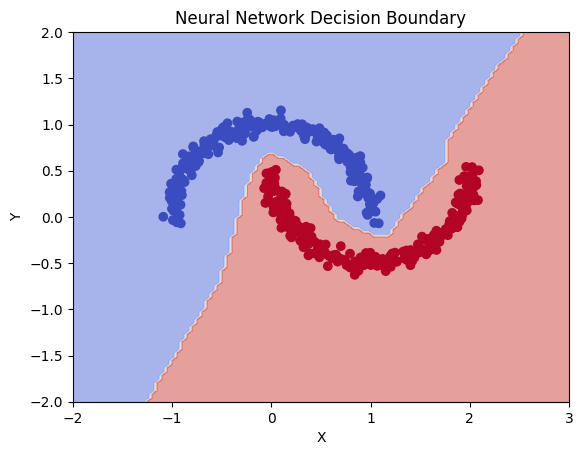

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, activation='relu')) # Utilizo el método relu (Si y <= 0, entonces 0. Si y > 0, entonces x)
model.add(Dense(8, activation='relu')) # Utilizo el método relu (Si y <= 0, entonces 0. Si y > 0, entonces x)
model.add(Dense(8, activation='relu')) # Utilizo el método relu (Si y <= 0, entonces 0. Si y > 0, entonces x)
model.add(Dense(2, activation='softmax')) # El método softmax convierte los y en valores entre 0 a 1,
                                          # dónde la suma de todos los valores es igual a 1

optimizer = Adam(learning_rate=0.005) # Adam optimization es un método estocástico de descenso de gradiente, basado en las derivadas de primer
                           # y segundo orden de la función costo

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #Testea en función de la accuracy del modelo


model.fit(X, Y, epochs= 100 , batch_size=32, validation_split=0.2) #Le pido sólo 100 iteraciones porque mi learning_rate no es tan bajo (0.005)

# Grafico los resultados
# Generate a grid of points to classify
xx, yy = np.meshgrid(np.linspace(-2, 3, num=100), np.linspace(-2, 2, num=100))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Predict class probabilities for each point on the grid
y_pred = model.predict(X_grid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot the decision boundary
plt.contourf(xx, yy, y_pred_classes.reshape(xx.shape), alpha=0.5, cmap=plt.cm.coolwarm)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)

plt.title('Neural Network Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Keras me permite dividir de buena manera los dos grupos de media luna. Si le agregase más iteraciones o le pusiese más neuronas por capa (16 en vez de 8), los dos grupos se diferenciarían un poco más. Pero ya con 100 iteraciones y 8 neuronas por capa, se diferencian muy bien.